In [1]:
import numpy as np
import pandas as pd
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from IPython.display import display, HTML

In [2]:
#reading in data
stopVariability = pd.read_csv("variabilityBetweenStops.csv")
stopCoords = pd.read_csv("stopCoords.csv")

In [3]:
stopVariability = stopVariability.sort_values("StdDev", ascending = False)
topTenHighestVariable = stopVariability.head(1)
display(HTML(topTenHighestVariable.to_html()))

,Unnamed: 0,Stop1,Stop2,MeanTime,StdDev,NumJourneys
0,15030,1141.0,6282.0,1804.5,1390.879039,2.0


In [4]:
highVariableStops = list(set(topTenHighestVariable.Stop1.unique()) | set(topTenHighestVariable.Stop2.unique()))
highestVariableStopsCoords = stopCoords[stopCoords["StopID"].isin(highVariableStops)]
froms = stopCoords[stopCoords["StopID"].isin(topTenHighestVariable.Stop1)]
tos = stopCoords[stopCoords["StopID"].isin(topTenHighestVariable.Stop2)]
BBox = ((highestVariableStopsCoords.Long.min(), highestVariableStopsCoords.Long.max(), highestVariableStopsCoords.Lat.min(), highestVariableStopsCoords.Lat.max()))

print(BBox)
display(HTML(froms.to_html()))
display(HTML(tos.to_html()))


(-6.318781643614852, -6.3110969999999975, 53.28403290248878, 53.28991300000001)


,Unnamed: 0,StopID,Long,Lat
3547,3547,1141.0,-6.311097,53.289913


,Unnamed: 0,StopID,Long,Lat
76,76,6282.0,-6.318782,53.284033


In [6]:
m = Basemap(llcrnrlon=BBox[0],llcrnrlat=BBox[2],urcrnrlon=BBox[1],urcrnrlat=BBox[3],
             resolution='i', projection='cyl')

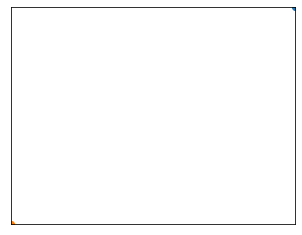

In [7]:
lon1, lat1 = m(froms.Long.values, froms.Lat.values)
lon2, lat2 = m(tos.Long.values, tos.Lat.values)

m.plot(lon1, lat1, marker="o", ls="", label="Start")
m.plot(lon2, lat2, marker="o", ls="", label="Fin")

NameError: name 'lines' is not defined

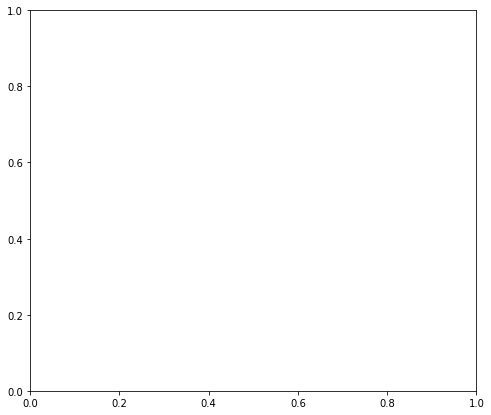

In [8]:
mapImg = plt.imread('map.png')
#drawing plot
fig, ax = plt.subplots(figsize = (8,7))
# ax.scatter(highestVariableStopsCoords.Long, highestVariableStopsCoords.Lat, zorder=1, alpha= 0.2, c='b', s=10)
for l in lines:
    x = l[0]
    y = l[1]
    plt.plot(x, y)
ax.set_title('Most Variable Bus Stops in Dublin')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(mapImg, zorder=0, extent = BBox, aspect= 'equal')